# Importing Packages

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Loading the Data

In [3]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [4]:
# Convert the feature data and target labels to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
# Use the sample method to select a random sample of rows from the DataFrame
df.sample(n=10, random_state=42)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,24.64,96.05,677.9,0.14260,0.2378,0.2671,0.10150,0.3014,0.08750,1
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,26.58,165.90,1866.0,0.11930,0.2336,0.2687,0.17890,0.2551,0.06589,0
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019,0
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,...,22.91,89.61,515.8,0.14500,0.2629,0.2403,0.07370,0.2556,0.09359,1
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.13450,0.2118,0.1797,0.06918,0.2329,0.08134,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.8681,0.9387,0.26500,0.4087,0.12400,0
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,...,25.80,195.00,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574,0
29,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,...,19.52,134.90,1227.0,0.12550,0.2812,0.2489,0.14560,0.2756,0.07919,0
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,...,23.19,96.66,614.9,0.15360,0.4791,0.4858,0.17080,0.3527,0.10160,1
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,21.80,101.20,718.9,0.09384,0.2006,0.1384,0.06222,0.2679,0.07698,1


In [7]:
num_cols = df.shape[1]

print('Number of columns:', num_cols)

Number of columns: 31


In [8]:
name_cols=df.columns
name_cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [9]:
print('Missing values in the dfset : ',df.isna().sum().sum())
print('Duplicate values in the dfset : ',df.duplicated().sum())

Missing values in the dfset :  0
Duplicate values in the dfset :  0


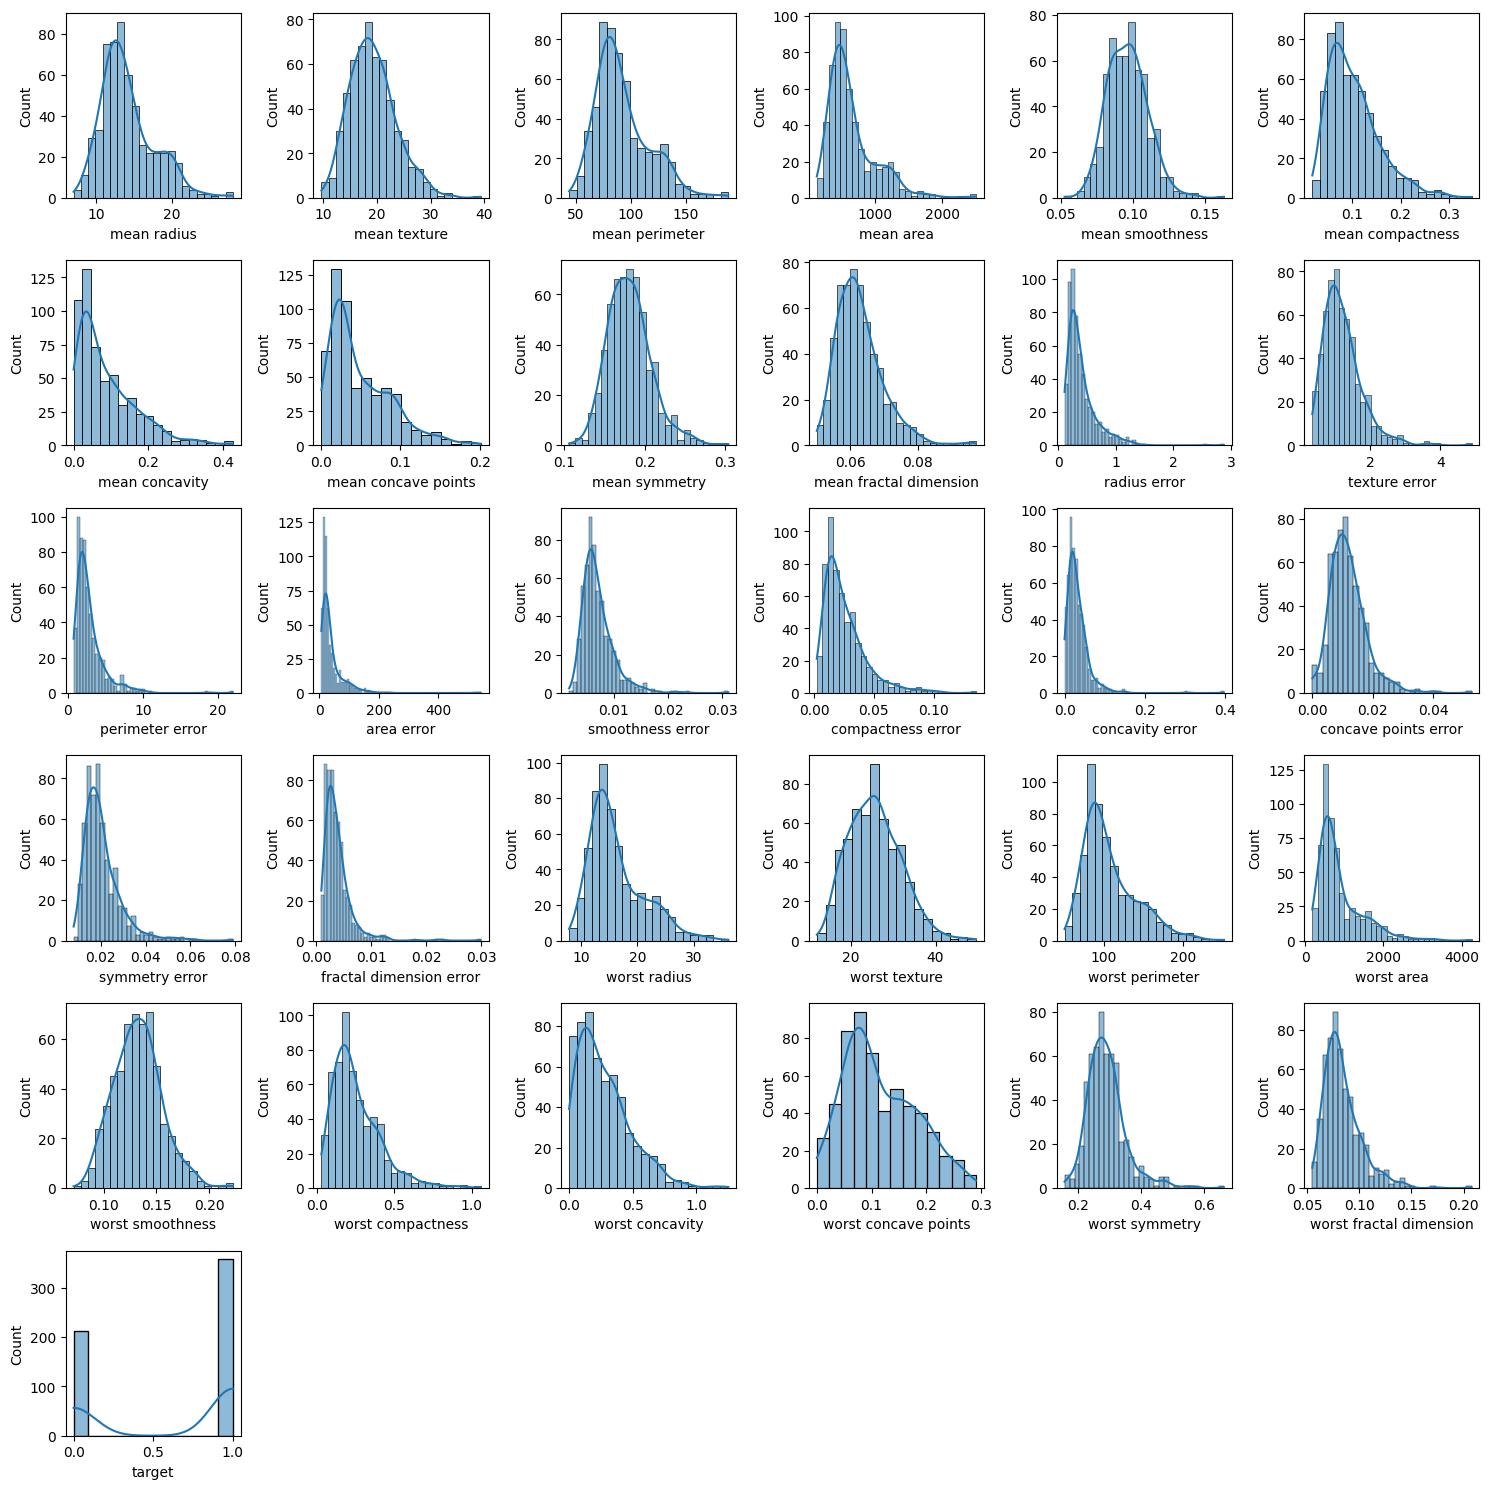

In [10]:
plt.figure(figsize=(15,15))

n_cols = 6
n_rows = 6

for i, col in enumerate(name_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True)

plt.tight_layout()
plt.show()

# Exploratory Analysis

## Data Visualization

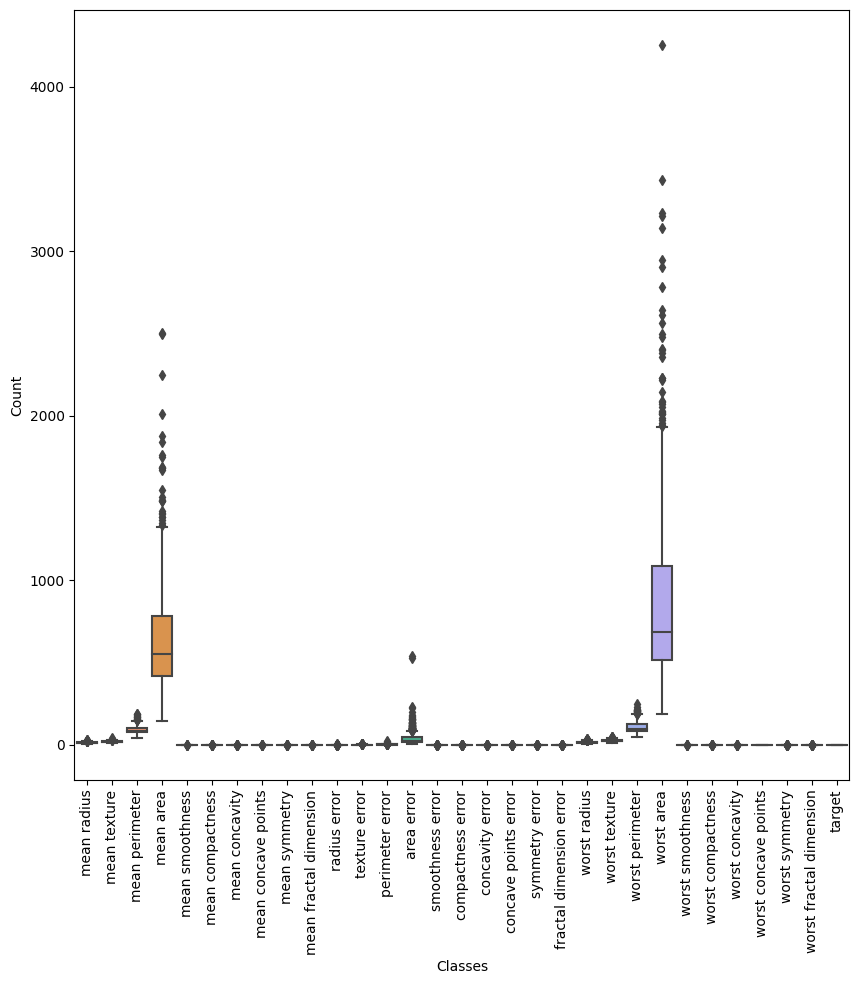

In [11]:
plt.figure(figsize=(10,10))
sns.boxplot(df)
plt.xticks(range(num_cols),name_cols , rotation=90)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


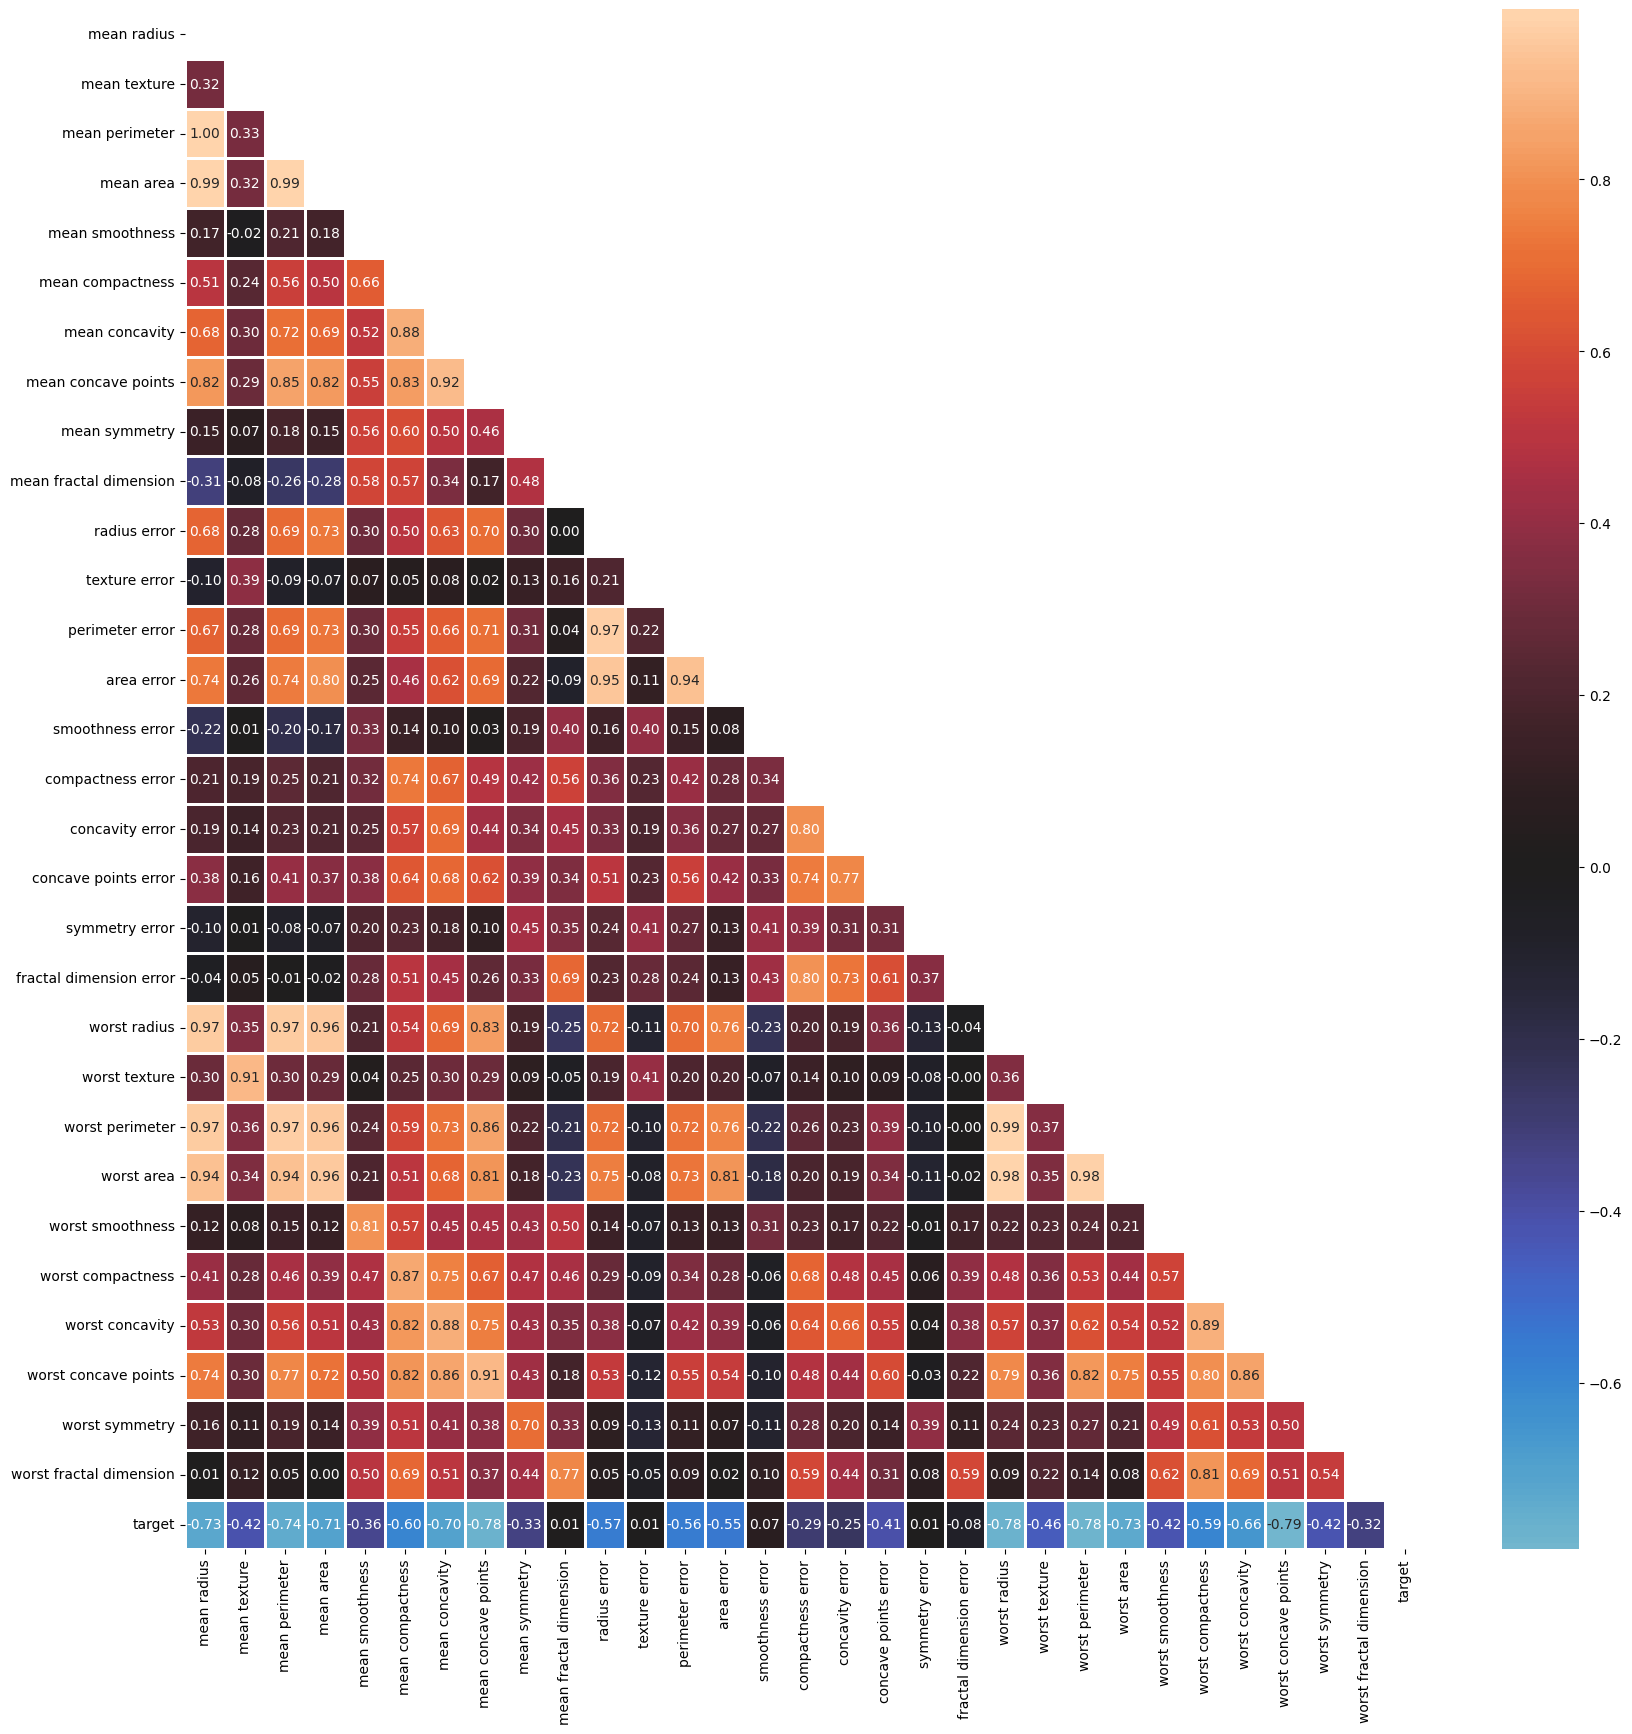

In [14]:
# Create the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool))
, center=0, linewidths=1, annot=True, fmt=".2f")

plt.show()

### Removing highly correlated data

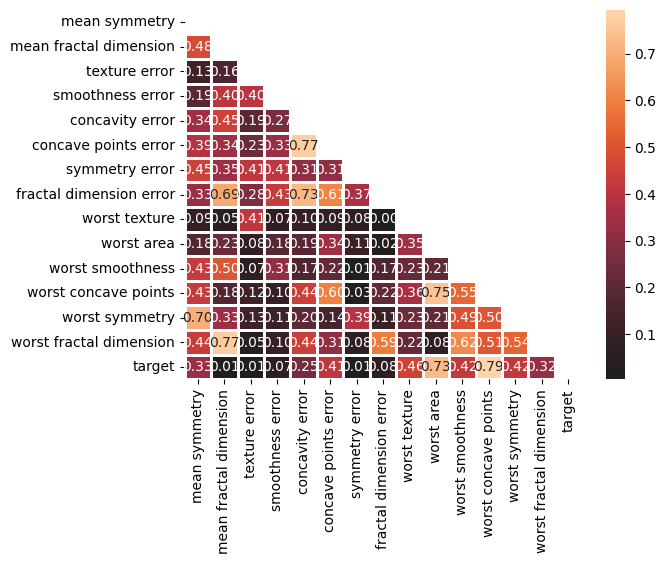

In [15]:
# Calculate the correlation matrix and take the absolute value
corr_df = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.80)]

# Drop the features in the to_drop list
reduced_df = df.drop(to_drop, axis='columns')

# Create the correlation matrix
reduced_corr = reduced_df.corr().abs()

# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(reduced_corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(reduced_corr, mask=np.triu(np.ones_like(reduced_corr, dtype=bool))
, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

# Model Training

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
scaler= StandardScaler()
X=scaler.fit_transform(data.data)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42)


### Logistic Regression

In [26]:
# Train a logistic regression model on the data
clf = LogisticRegression()
clf.fit(X_train, y_train)


C:\Users\LENOVO G3\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.965034965034965


### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test)

In [34]:
print(accuracy_score(y_train, knn.predict(X_train)))



0.9342723004694836


In [35]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)

0.965034965034965
